![R-Kenntnis](../Pics/header.png "R-Kenntnis")

<img src="https://img.shields.io/badge/--Kenntnis-blue?style=flat-square&logo=r&logoColor=white"/> <a href="https://ostfalia.de/w" target="_blank"><img src="https://img.shields.io/badge/Ostfalia-Fakultät%20W-blue?style=flat-square&logo=googlescholar&logoColor=white"/></a> <img src="https://img.shields.io/badge/Semester-WiSe2023%2F24-green?style=flat-square"/> <img src="https://img.shields.io/badge/Copyright-2020--24-orange?style=flat-square"/> <a href="https://creativecommons.org/licenses/by-nc-sa/4.0/" target="_blank"><img src="https://img.shields.io/badge/License-by--nc--sa-red?style=flat-square"/></a> 

<div class="alert alert-block alert-info">
<img src="https://img.shields.io/badge/Information-Übung_07-blue?style=for-the-badge&logo=bookstack&logoColor=white">

* **Titel:** R-Kenntnis Übungen 07: Lineare Regression
* **Autor:** Prof. Dr. Denis Royer
* **Datum:** 07.12.2023 (Version 3.1)
* **Zugehöriges Vorlesungsmodul:** LV10 - Lineare Regression

</div>

![Header_Modelling](../Pics/header_modelling.png "Modelling")

<div class="alert alert-block alert-success">
    
# Überblick 
## 07: Lineare Regression



## Vermittelte Kompetenzen:



</div>

# BI - R-Kenntnis Übungen 07: Lineare Regression

Bitte lesen Sie die folgenden Kapitel und die enthaltenen Hinweise ***sorgfältig*** durch. Die Aufgaben sind zum Teil in den Kapiteln enthalten.

<div class="alert alert-block alert-warning">
<b>WICHTIG:</b> 
    
*Die Schritte im Source Code bauen zum Teil aufeinander auf. Sollten Sie Ihre RStudio oder JupyterLab Session schließen oder neu starten, so müssen Sie ggf. den **Code erneut ausführen**, bzw. die **Packages neu laden**.*
    
</div>

<div class="alert alert-block alert-info">
<b>Hinweis:</b> Weitere Hinweise und Quellen finden Sie <a href="../index.ipynb">auf der zenteralen Übersicht zu den Übungen</a>. </div>

## Anwendungsfall Lineare Regression

**Für diese Übung soll der folgende Anwendungsfall genutzt werden:**

 > Im Online Marketing sollen verschiedene Kanäle wie Social Media, E-Mail oder Affiliate Marketing zur Umsatzsteigerung der *Bike Sharing LLC* beitragen. Mithilfe von Regressionsmodellen soll analysiert werden, wie der Marketingetat gesteuert und hierdurch die bisherige Marketingstrategien gezielt umstrukturiert und Werbebudgets angepasst werden können.

 > Im oben genannten Kontext untersucht die **Bike Sharing LLC** den Zusammenhang zwischen dem Marketing Budget und dem Umsatz innerhalb eines bestimmten Zeitraums. 

<div class="alert alert-block alert-warning">
<b>Diese Übung hat folgende Ziele:</b> 
    
* Die Anwendungsfelder und der Aufbau der linearen Regression als **Analysemodell** können benannt werden.
* Die Modellannahmen der linearen Regresion können überprüft werden.
* Die Lineare Regression kann auf versch. Anwendungsfälle angewandt werden.
    
</div>

## Aufbau der Übung

Diese Übung besteht aus den folgenden Elementen:

1. Ein theoretischer Überblick über die lineare Regression als Modell.
2. Wie man die lineare Regression mkt R nutzen kann? Dies wird anhand eines praktischen Beispiels der Markting Daten der **Bike Sharing LLC**.
3. Was sind Residuen (Fehlerterme)?
4. Wie überprüft man die Modellannahmen der linearen Regression (wieder anhand des Fallbeispiels)?
5. Wie nutzt man die lineare Regression zur Vorhersage von Werten?
6. Neben den eingebetteten Übungsaufgaben sind am Ende dieses Moduls **weitere Übungsaufgaben** zur linearen Regression zu finden.

## Vorbereitende Schritte für die Übung 07


<div class="alert alert-block alert-warning">
<b>Wichtig:</b> Bevor wir loslegen, müssen wir zunächst einmal ein paar vorbereitende Dinge erledigen:

* Die notwendigen Packages laden (bspw. `tidyverse`)
* Datensatz laden (siehe *Data/marketing.csv*)

</div>

In [ ]:
library(tidyverse)
library(ggplot2)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


# Warum Lineare Regression?

Lineare Regression ist ein hilfreiches Mittel, um im Business Intelligence Bereich Daten analysieren zu können:

* Die Lineare Regression funktioniert für eine Vielzahl an Problemen und Datensätzen.
* Die Lineare Regression kann für viele Business Intelligence Fragestellungen genutzt werden.
* Die Lineare Regression ist die Basis für andere, fortgeschrittene Analysemethoden (speziell für andere prädiktive Analysemethoden).

## Vorbereitung: Der Datensatz

Für diese Übung verwenden wir erneut den Marketing Datensatz von *Bike Sharing LLC*:

Im Rahmen einer umfassenden Marketinganalyse hat *Bike Sharing LLC* eine Studie anderer Mitbewerber im Bereich Fahrradverleih eingekauft. Der Datensatz selbst enthält Informationen zu 172 Mitbewerbern, welche für eine Trendanalyse in der Fahrradverleihbranche erhoben wurden.

In [ ]:
# Laden der Daten
marketing.raw <- read_csv("../Data/marketing.csv")
# Wir wollen nur die nummerischen Anteile des Datensatzes nutzen
# Dementsprechend kopieren wir uns diese Spalten aus den Rohdaten in einen neune
# Data Frame:
adverts.df <- marketing.raw[,1:5] # Spalten 1-5

Rows: 172 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): pop_density
dbl (6): google_adwords, facebook, twitter, marketing_total, revenues, emplo...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [ ]:
# Ausgabe der ersten 8 Zeilen des Datensatzes
adverts.df[1:8,]

## Erste Übersicht
Eine erste grafische Analyse mittels der `pairs()` Funktion erlaubt uns, einen Überblick über die Daten zu bekommen. Dabei lässt sich beispielsweise ein Zusammenhang zwischen den Variablen *Marketing gesamt* und *Umsätze* feststellen (siehe auch vorherige Übung): 

In [ ]:
pairs(adverts.df)

In [ ]:
plot(adverts.df$marketing_total,
     adverts.df$revenues, 
     ylab = "Umsätze", 
     xlab = "Marketing gesamt", 
     main = "Umsatz und Marketing"
    )

# Lineare Regression mit R

Die Lineare Regression (kurz: LR) die einen Spezialfall des allgemeinen Konzepts der Regressionsanalyse darstellt, ist ein statistisches Verfahren, mit dem versucht wird, eine beobachtete abhängige Variable durch eine oder mehrere unabhängige Variablen zu erklären. Solch ein Modell nennt man Lineares Modell (kurz: LM). Das Beiwort „linear“ ergibt sich dadurch, dass die abhängige Variable eine Linearkombination der Regressionskoeffizienten darstellt (aber nicht notwendigerweise der unabhängigen Variablen). Der Begriff Regression bzw. Regression zur Mitte wurde vor allem durch den Statistiker *Francis Galton* geprägt.

***Formel der Einfachen Linearen Regression:*** ${\displaystyle Y_{i}=\beta _{0}+\beta _{1}x_{i}+U_{i}}$

![Koordinatensystem Regression](../Pics/regression_coord.jpg "Koordinatensystem Regression")

Bei der Linearen Regression werden unterschiedliche Informationen mit einbezogen, von denen man annimmt, dass sie alle das zu vorhersagende Phänomen beeinflussen:

* **$x_{i}$:** Diese sind also der Ausgangspunkt für die Vorhersage - man nennt sie *Prädiktorvariablen* ($x_{i}$) oder unabhängige Variable.
* **$Y_{i}$:** Das Phänomen, dessen Ausprägung man vorhersagen möchte, wird *Kriteriumsvariable* ($Y_{i}$) oder abhängige Variable genannt
* **$\beta _{0}$:** Intercept
* **$\beta _{1}$:** Regressionskoeffizient der Variable $x$.
* **$U_{i}$:** Unbeobachtbare Fehlervariable, unabhängig und identisch verteilt.

In ***R*** wird eine einfache Lineare Regression (*[en.]*: *Simple Linear Regression* - ***SLR***) wie folgt dargestellt:

``` R
model1 <- lm(Kriterium ~ Prädiktor, data = meine_datentabelle)
```


**In Worten:** *Kriterium* wird modelliert als Funktion von *Prädiktor*, wobei sich diese Variablen im Dataframe meine_datentabelle finden.

![Übungsaufgabe](../Pics/excercise.png "Übungsaufgabe")
![](https://img.shields.io/badge/Aufgabe-7.1-blue?style=for-the-badge&logo=r&logoColor=white)

***Frage:*** In Bezug auf die Ziele des Modellierens: Um welchen Typ des Modellieren handelt es sich bei der Linearen Regression?

Angewendet auf unseren Datensatz ergibt sich für die Variablen *Marketing gesamt* und *Umsätze* folgendes Modell:

In [ ]:
# Erstellung des Linearen Modells
model1 <- lm(revenues ~ marketing_total, data = adverts.df)

In [ ]:
# Ausgabe der Daten im resultierenden Linearen Modell
model1


![Übungsaufgabe](../Pics/excercise.png "Übungsaufgabe")

***Frage:*** 

* Wie lassen sich die Ausgaben interpretieren?
* Welche Daten enthält die Liste `model1`? (Hier kann die Funktion `str()` hilfreich sein)

In [ ]:
str(model1)

Diese Modell (`model1`) kann nun grafisch ausgegeben werden:

In [ ]:
# Ausgabe mit der bereits bekannten plot() Funktion
plot(adverts.df$marketing_total, 
     adverts.df$revenues, 
     ylab = "Umsätze", 
     xlab = "Marketing",
     main = "Marketing Total vs. Umsätze (Plot)", 
     xlim = c(50, 150), xaxt = "n")
abline(model1) # Regressionsgerade in den Plot einfügen

In [ ]:
# Alternativ kann man das ggplot2 Paket nutzen, das die Grafiken etwas aufwendiger
# aufbereiten kann.
ggplot(adverts.df, aes(x=marketing_total, y=revenues)) + 
        geom_point() + 
        geom_smooth(method='lm', color='red', se = FALSE) +
        ggtitle("Marketing Total vs. Umsätze (ggplot)") +
        theme_bw()

# Residuen (Fehlerterme - $\epsilon$)

Residuen (auch *Fehler* oder *Vorhersagefehler*), spielen eine wichtige Rolle bei der Bewertung der Güte eines Linearen Modells. Die grundlegende Überlegung zur Modellgüte lautet: "*Wie groß ist der Unterschied zwischen Vorhersage und Wirklichkeit?*"
Generell gilt: Je kürzer die "*Abweichungslinien*", desto besser die Vorhersage eines Linearen Modells.

Die folgende Grafik stellt diesen Zusammenhang einmal visuell dar:

In [ ]:
# Ausgabe der Rohdaten als Plot
plot(adverts.df$marketing_total, adverts.df$revenues, 
     ylab = "Revenues", 
     xlab = "Marketing",
     main = "Revenues versus Marketing", 
     xlim = c(50, 150), 
     xaxt = "n")
# Einfügen der Regressionsgerade aus model1 in den Plot
abline(model1)

# Einfügen der Abweichungslinie aus einem Messwert (Predicted) und
# dem Erwartungswert (Actual) der Lineare Regression mit Beschriftung
segments(x0 = 53.6, y0 = 31.0, x1 = 53.6, 
         y1 = 34.68, lwd = 2, lty = 3)
text(x = 57.5, y = 30.5, labels = "A")
text(x = 54.0, y = 36.3, labels = "P")
axis(1, at = c(53.6, 100, 150, 200, 250)) 

Für jeden Wert im Datensatz `adverts.df` gibt es zwei Werte für den Umsatz:

* ***A*** - Den gemessenen Wert (Actual)
* ***P*** - Den vorhergesagten Wert (Predicted)
* ***Residuen ($\epsilon$)*** - Dies ist die Differenz aus </br>$\epsilon = \textit{Predicted} - \textit{Actual}$.

# Überprüfung der Modellannahmen (*L.U.N.K. Ansatz*)
Um eine Lineare Regression nutzen zu können, müssen die folgenden vier Kernannahmen erfüllt sein:

* ![](https://img.shields.io/badge/Step-1-lightgrey?style=flat) ***Linearität:*** Lineare Abhängigkeit zwischen den erklärenden Variablen und der Zielvariable.
* ![](https://img.shields.io/badge/Step-2-lightgrey?style=flat) ***Unabhängigkeit:*** Die unabhängigen Variablen dürfen untereinander nicht zu stark korrelieren.
* ![](https://img.shields.io/badge/Step-3-lightgrey?style=flat) ***Normalverteilung der Residuen:*** Die Fehlerterme folgen einer Normalverteilung.
* ![](https://img.shields.io/badge/Step-4-lightgrey?style=flat) ***Konstante Varianz (Homoskedastizität):*** Die Varianz des Fehlerterms darf nicht von unabhängigen Variablen oder der Beobachtungsreihenfolge abhängig sein, somit sollte die Varianz konstant für alle Beobachtungseinheiten sein.

## ![](https://img.shields.io/badge/Step-1-lightgrey?style=flat) Linearität 

Zunächst sollte untersucht werden, ob zwischen den metrischen unabhängigen Variablen (*Prädiktorvariable*) und der abhängigen Variablen (*Kriteriumsvariable*) überhaupt ein linearer Zusammenhang besteht. Dies lässt sich grafisch anhand von einem Streudiagramm gut überprüfen:

In [ ]:
ggplot(adverts.df, aes(x=marketing_total, y=revenues)) + 
        geom_point() +
        ggtitle("Marketing Total vs. Umsätze (ggplot)") +
        theme_bw()


![Übungsaufgabe](../Pics/excercise.png "Übungsaufgabe")


***Frage:*** Was kann man aus dem Plot der Variablen *Marketing gesamt* und *Umsätze* schließen?

## ![](https://img.shields.io/badge/Step-2-lightgrey?style=flat) Unabhängigkeit

Dies ist womöglich die am schwersten zu überprüfende Annahme, die man überprüfen kann. Es geht im Kern darum, dass die getätigten Beobachtungen voneinander unabhängig sind - sich also nicht beeinflussen. Im Rahmen des "*Data Understanding*" ist es bspw. ein guter Ansatz, sich die Datenerhebung einmal genauer anzuschauen. So bekommt man einen guten Einblick, ob die Erhebungsmethode ggf. schon Probleme mit sich bringt oder nicht.

![Übungsaufgabe](../Pics/excercise.png "Übungsaufgabe")

![](https://img.shields.io/badge/Aufgabe-7.2-blue?style=for-the-badge&logo=r&logoColor=white)

***Frage:*** Was für Rückschlüsse bezüglich der Unabhängigkeit kann man bei den hier vorliegenden Daten treffen?

## ![](https://img.shields.io/badge/Step-3-lightgrey?style=flat) Normalverteilung der Residuen

Für den Test der Normalverteilung können ein *Histogramm* oder ein *Q-Q Plot* hilfreich sein. Alternativ kann noch ein Kolmogorov-Smirnov-Anpassungstest durchgeführt werden (Siehe auch Lehrveranstaltung BI-07 ff. für Details zu diesem Thema).

Für den vorliegenden Fall ergeben sich die folgenden zwei Plots (*Histogramm* und *Q-Q Plot*) für die Verteilung der Residuen.

In [ ]:
# Ausgabe der Residuen als Histogram
hist(model1$residuals, xlab = "Residuen", col = "gray",
     main = "Residuenverteilung")

In [ ]:
# Ausgabe der Residuen als Q-Q Plot
# ==> Sin die Residuen normalverteilt?
qqnorm(model1$residuals, main = "Q-Q Plot der Residuen")
qqline(model1$residuals) 


![Übungsaufgabe](../Pics/excercise.png "Übungsaufgabe")

![](https://img.shields.io/badge/Aufgabe-7.3-blue?style=for-the-badge&logo=r&logoColor=white)

***Frage:*** Was kann man anhand der 2 Plots bezüglich der Residuen für Rückschlüsse ableiten?

## ![](https://img.shields.io/badge/Step-4-lightgrey?style=flat) Konstante Varianz (Homoskedastizität)

Weiterhin wird vorausgesetzt, dass die Residuen unabhängig sind und eine konstante Varianz aufweisen (sog. Homoskedastizität). 

**Homoskedastizität** bedeutet, dass die Varianz der Residuen in einer **Regressionsanalyse** für alle Werte des Prädiktors konstant ist. Das heißt, die Abweichungen der vorhergesagten Werte von den wahren Werten sind in etwa immer gleich groß – unabhängig wie hoch oder niedrig der Wert des Prädiktors ist.

Dies kann **grafisch überprüft werden**, indem die geschätzten Werte der abhängigen Variablen in einem Streudiagramm gegen die geschätzten Residuen des Modells abgetragen werden (sog. Residuenplots).

Die Punkte in dem Diagramm sollten **unsystematisch streuen**. Das Auftreten einer Trichterform deutet auf eine Verletzung der Annahme konstanter Varianzen („Heteroskedastizität“) hin. Ist eine Systematik in den Punkten erkennbar, so ist diese meist auf eine Verletzung der Unabhängigkeitsannahme zurückzuführen. Im Fall (A) verteilen sich die Residuen ungefähr in einem gleichbleibend dicken, horizontalen Band. Hier sind weder Abhängigkeiten, noch Heteroskedastizität erkennbar. Auf den Streudiagrammen (B,C,F) sind  "Trichter" oder "Rauten" erkennbar. Das weist also auf die Verletzung der Homoskedastizitätsannahme hin. 

![**Abbildung:** Beispiele für Homo- und Heteroskedastizität (vgl. Hicketier(2019)).](../Pics/Hetero.png)

Fälle wie (D) und (E) zeigen einen quadratischen/ logarithmischen Zusammenhang. Die Residuen streuen also nicht zufällig, sondern es ist eine **klare Systematik** erkennbar. Oft hängt diese Annahmenverletzung mit Problemen der Nichtlinearität (zwischen abhängiger und unabhängiger Variable) zusammen.

### Grafische Exploration

Für das Modell aus der SLR für die Variablen *Marketing gesamt* und *Umsätze* ergibt sich hierbei folgender Residuenplot:

In [ ]:
# Plot der Residuen des Linearen Modells
plot(model1$fitted.values, 
     model1$residuals, 
     ylab = "Residuen",
     xlab = "Fitted Values", 
     main = "Verteilung der Residuen")

# Hinzufügen der Mittellinie und der 2 gestrichelten Linien
# über und unter der Mittelllinie als Korridor
abline(0, 0, lwd = 3)
abline(h = c(-6.5, 6.5), lwd = 3, lty = 3)

Weiterhin kann man noch andere Plots und Tests durchführen, um die Konstanz der Varianz (also die Homoskedastizität) zu überprüfen.

In [ ]:
par(mfrow = c(2, 2)) # Darstellung der Grafiken als Matrix
plot(model1)

ERROR: Error in eval(expr, envir, enclos): object 'conf_interval' not found


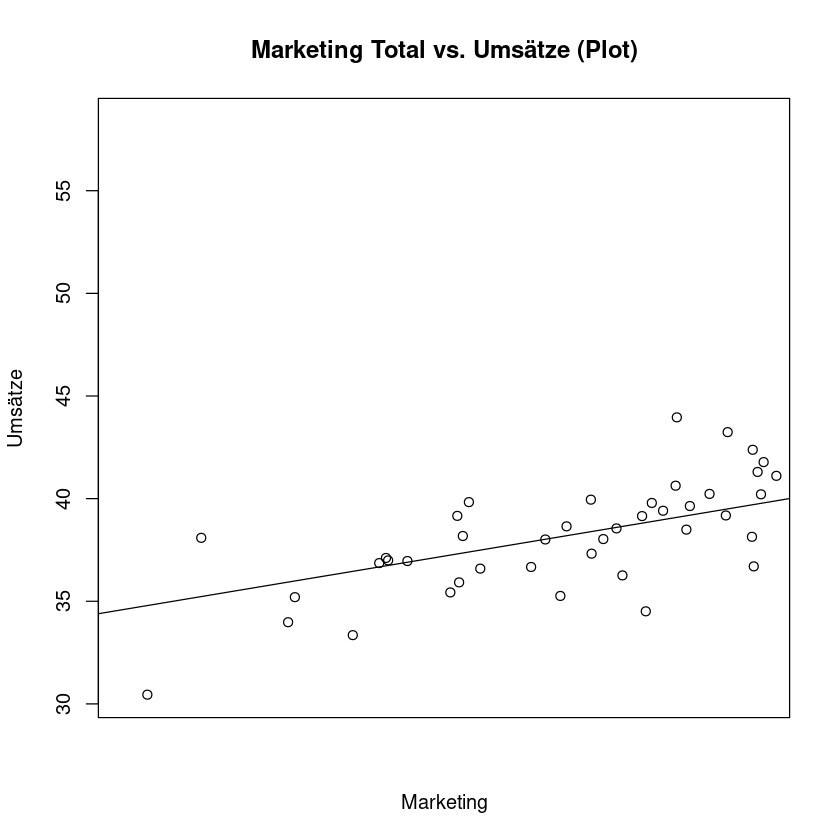

In [ ]:
plot(model1, 1)

Zunächst schaut man sich nur die Streuung der Punkte in den Plots an. Da in den obigen Diagrammen keine Zunahme oder Abnahme der Streuung erkennbar ist, also man keinen nach links oder rechts geöffneten Trichter erkennen kann, würde man hier zunächst eher keine Heteroskedastizität unterstellen.

Das obere Diagramm hilft zusätzlich mit einer roten Linie, die möglichst gerade sein sollte. Ist sie wellig oder hat eine positive oder negative Steigung, würde man definitiv von Heteroskedastizität sprechen. Wie wir noch sehen werden, kommen wir mit der folgenden analytischen Prüfung auf ein anderes Ergebnis.

### Signifikanztests

Viele statistische Verfahren setzen voraus, dass die Varianzen innerhalb verschiedener Fallgruppen gleich sind (beispielsweise Signifikanztests und Mittelwertvergleiche).

* Gleichheit der Varianzen = **Homoskedastizität**
* Ungleichheit der Varianzen = **Heteroskedastizität**

Mit dem Signifikanztest nach Fisher oder nach Breusch-Pagan wird folgende Nullhypothese $H_{0}$ überprüft: 
> **Die Varianzen in der Grundgesamtheit ist in allen Gruppen homogen (bei Annahme einer Normalverteilung)**

Eine geringe Wahrscheinlichkeit (p-Wert) weist auf eine Varianzungleichheit (Heteroskedastizität) hin.

In [ ]:
# Signifikanztest nach Fisher
var.test(adverts.df$marketing_total, adverts.df$revenues)

In [ ]:
# Breusch-Pagan Test
library(lmtest)
bptest(model1)


![Übungsaufgabe](../Pics/excercise.png "Übungsaufgabe")

![](https://img.shields.io/badge/Aufgabe-7.4-blue?style=for-the-badge&logo=r&logoColor=white)

**Frage:** Was fällt bei den p-Werten der beiden Tests auf und wie lässt sich dies interpretieren (siehe auch Hinweis in der roten Box)?

<div class="alert alert-block alert-danger">
<img src="https://img.shields.io/badge/Hinweis-Achtung-red?style=for-the-badge&logo=r&logoColor=white" style="vertical-align:middle;">
    
Analytische Tests verwerfen die Nullhypothese mit zunehmender Stichprobengröße häufiger, obwohl die Abweichungen marginal sind. Deswegen ist die grafische Methode (s.o.) häufig die bessere Wahl bei mehreren hundert Beobachtungen. Bei kleineren Stichproben gelten die Tests jedoch als hinreichend zuverlässig.
</div>



![Übungsaufgabe](../Pics/excercise.png "Übungsaufgabe")

![](https://img.shields.io/badge/Aufgabe-7.5-blue?style=for-the-badge&logo=r&logoColor=white)

***Frage:*** Welcher Typ von Varianz liegt beim Plot der Residuen aus dem Beispiel vor und warum?

- [ ] Homoskedastizität
- [ ] Heterokedastizität

<div class="alert alert-block alert-info">
<b>Hinweis:</b> Weitere Infos zum Thema Homoskedastizität finden sie hier: <a href="https://bjoernwalther.com/heteroskedastizitaet-in-r-erkennen-und-beheben/" target="_blan">https://bjoernwalther.com/heteroskedastizitaet-in-r-erkennen-und-beheben/</a>. </div>

# Weitere Informationen

Die `summary()` Funktion liefert noch weitere Informationen zum Modell:

In [ ]:
summary(model1)


![Übungsaufgabe](../Pics/excercise.png "Übungsaufgabe")

![](https://img.shields.io/badge/Aufgabe-7.6-blue?style=for-the-badge&logo=r&logoColor=white)

***Frage:*** Welche Informationen gibt einen die `summary()` Funktion?

# Lineare Regression zur Vorhersage nutzen

Man kann ein abgeleitetes Lineares Modell natürlich auch für vorhersagen nutzen. **Das funktioniert am besten für Werte, die innerhalb der Range des Originaldatensatzes liegen** - im vorliegenden Fall im Bereich von:

In [ ]:
range(adverts.df$marketing_total)

Um nun Voraussagen treffen zu können kann man die Funktion `predict.lm()` nutzen. Nehmen wir an, wir wollen für den Wert 465.000,00 Euro Marketingbudget den Umsatz ableiten (das Konfidenzintervall liegt bei 95%).

In [ ]:
newdata <- data.frame(marketing_total = 465) # Wert in K€
predict.lm(model1, newdata, interval = "predict")

<div class="alert alert-block alert-info">
<b>Hinweis:</b> Ein Konfidenzintervall, kurz KI, (auch Vertrauensintervall, Vertrauensbereich oder Erwartungsbereich genannt) ist in der Statistik ein Intervall, das die Präzision der Lageschätzung eines Parameters (z. B. eines Mittelwerts) angeben soll. Das Konfidenzintervall gibt den Bereich an, der mit einer gewissen Wahrscheinlichkeit (der Überdeckungswahrscheinlichkeit) den Parameter einer Verteilung einer Zufallsvariablen einschließt. Ein häufig verwendetes Konfidenzniveau ist 95 %.</div>

Der Parameter `interval` in der `predict.lm` steuert die Art des Konfidenzintervalls, das für die Vorhersagen zurückgegeben wird. Es gibt drei mögliche Werte für diesen Parameter:

1. `interval = "none"`: Wenn dieser Wert gesetzt ist, gibt die Funktion nur die Vorhersagen zurück, ohne Konfidenzintervalle.

2. `interval = "confidence"`: Dies erzeugt ein Konfidenzintervall für den mittleren Wert der Vorhersagen. Es gibt an, wo der erwartete Mittelwert der abhängigen Variablen für gegebene Werte der unabhängigen Variablen mit einer bestimmten Wahrscheinlichkeit (typischerweise 95%) liegt. 

3. `interval = "predict"`: Dies erzeugt ein Vorhersageintervall. Im Gegensatz zum Konfidenzintervall, das sich auf den Mittelwert der Vorhersagen bezieht, gibt das Vorhersageintervall den Bereich an, in dem zukünftige Beobachtungen mit einer bestimmten Wahrscheinlichkeit erwartet werden. Das Vorhersageintervall ist breiter als das Konfidenzintervall, da es zusätzlich zur Unsicherheit des Modells auch die Variabilität der Beobachtungen berücksichtigt.

Diese Intervalle sind nützlich, um die Genauigkeit und Zuverlässigkeit der Vorhersagen einzuschätzen.

Das Konfidenzintervall in der `predict.lm()` Funktion ist über den Parameter `level=` anpassbar - ebenso können mehrere Werte gleichzeitig berechnet werden:

In [ ]:
# Anpassung des Konfidenzintervalls:
predict.lm(model1, newdata, 
           level = 0.99, 
           interval = "predict")
predict.lm(model1, 
           newdata, 
           level = 0.90, 
           interval = "predict")

In [ ]:
# Berechnung mehrerer Werte für eine Prognose
newdata = data.frame(marketing_total = c(450, 460, 470))
predict.lm(model1, newdata, interval = "predict")

# Übungen
## Aufgabe 1: Analyse und Transformation der Daten

![Übungsaufgabe](../Pics/excercise.png "Übungsaufgabe")

![](https://img.shields.io/badge/Aufgabe-7.7-blue?style=for-the-badge&logo=r&logoColor=white) ![](https://img.shields.io/badge/Übung_Level:-2-red?style=for-the-badge&logo=legacygames)

Analysieren Sie die folgenden Daten mit dem "*L.U.N.K.*" Ansatz: 

* Fällt Ihnen was bei den Daten auf und wie lassen sich die Ergebnisse aus den einzelnen Schritten des L.U.N.K. Ansatzes interpretieren?
* Wie kann man ggf. den Datensatz "*reparieren*"?

In [ ]:
x0 <- c(1, 2, 3, 4, 5, 6, 7, 8, 9, 10)
y0 <- c(1.00, 1.41, 1.73, 2.00, 2.24,
        2.45, 2.65, 2.83, 3.00, 3.16)

## Aufgabe 2: Ausreißer

![Übungsaufgabe](../Pics/excercise.png "Übungsaufgabe")

![](https://img.shields.io/badge/Aufgabe-7.8-blue?style=for-the-badge&logo=r&logoColor=white) ![](https://img.shields.io/badge/Übung_Level:-1-yellow?style=for-the-badge&logo=legacygames)

Ausreißer können große Einflüsse auf Lineare Modelle haben, wie auch im folgenden Beispielgrafik abgebildet:

In [ ]:
# Datensatz 1 - Ausreißer beeinflust
x2 <- 1:20
y2 <- c(1:10, 4, 12:20)
fit2 <- lm(y2 ~ x2)

In [ ]:
# Datensatz 2 - Ausreißer beeinflust nicht
x3 <- c(1:20, 30)
y3 <- c(0.4, 2.2, 2.2, 5.6, 5.3, 5.2, 7.5, 8.7, 9.6, 9.7, 12.5,
        12.4, 12.4, 11.8, 16.1, 16, 17, 18.9, 19.8, 20.6, 30.0)
fit3 <-lm(y3 ~ x3)

In [ ]:
# Plot der Datensätze
par(mfrow = c(1, 2))
plot(x2, y2, pch = 19, main = "Ausreißer beeinflust")
abline(fit2)
plot(x3, y3, pch = 19, main = "Ausreißer beeinflust nicht")
abline(fit3)

Analysieren Sie folgenden Datensatz:

* Hat der Datensatz einen Ausreißer? Wenn ja welcher Datensatz?
* Was für einen Einfluss hat der Datensatz? Vergleichen Sie die Linearen Modelle und Ihre Kennzahlen.

In [ ]:
x4 <- c(1:20)
y4 <- c(0.4, 2.2, 2.2, 5.6, 5.3, 5.2, 7.5, 8.7,
        9.6, 9.7, 12.5, 12.4, 12.4, 12.8, 16.1,
        16.0, 17.0, 11.5, 19.8, 20.6)

# Lösungen

Die Lösungen zu den Übungen finden Sie in der *Datei <a href="R-Kenntnis LSG Uebung 07.ipynb">R-Kenntnis LSG Uebung 07.ipynb</a>*. Die Datei wird jeweils nach der Durchsprache der Übung bereitgestellt.

<div class="alert alert-block alert-info">
<img src="https://img.shields.io/badge/Info-Lösungen-blue?style=for-the-badge&logo=r&logoColor=white" style="vertical-align:middle;">
    
Die Datei wird jeweils nach der Durchsprache der Übung bereitgestellt.</div>